In [1]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

from learning2learn.images import generate_random_shape

Using TensorFlow backend.
/Users/reubenfeinman/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
def generate_colors(nb_train=50, nb_test=8, random=False):
    nb_colors = nb_train + nb_test
    nb_bins = np.round(np.power(nb_colors, 1 / 3)) + 1
    vals = np.linspace(0, 0.95, int(nb_bins))
    colors = []
    for r in vals:
        for g in vals:
            for b in vals:
                colors.append([r, g, b])

    colors = sorted(colors, key=lambda x: sum(x))
    colors = np.asarray(colors[-nb_colors:])
    if random:
        colors_train, colors_test = train_test_split(colors, test_size=nb_test, random_state=0)
    else:
        colors_train, colors_test = colors[:nb_train], colors[nb_train:]
    
    return colors_train, colors_test

def generate_textures(nb_train=50, nb_test=8, random=False):
    assert os.path.isdir('../data/textures')
    files = sorted([file for file in os.listdir('../data/textures') if file.endswith('tiff')])
    assert len(files) == 58
    assert nb_train + nb_test == 58
    if random:
        files_train, files_test = train_test_split(files, test_size=nb_test, random_state=0)
    else:
        files_train, files_test = files[:nb_train], files[nb_train:]
    
    return files_train, files_test

In [11]:
colors_train, colors_test = generate_colors(nb_train=50, nb_test=8, random=True)
textures_train, textures_test = generate_textures(nb_train=50, nb_test=8, random=True)

# Visualize colors

## Train

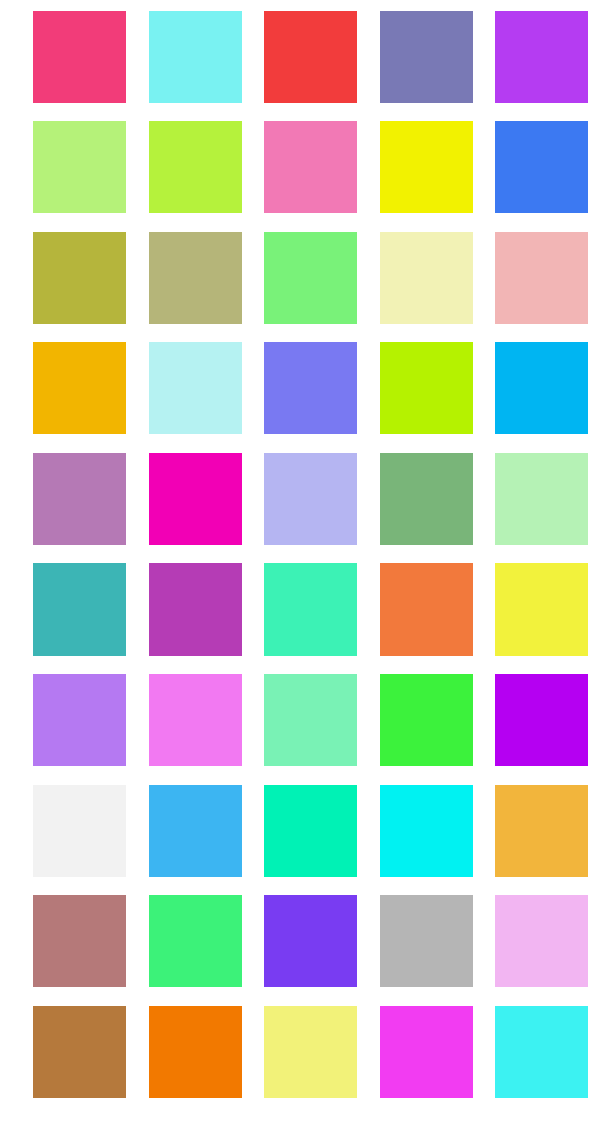

In [19]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10,20))
for r in range(10):
    for c in range(5):
        ix = r*5+c
        axes[r,c].imshow(np.ones(shape=(200,200,3))*colors_train[ix])
        axes[r,c].axis('off')
plt.show()

## Test

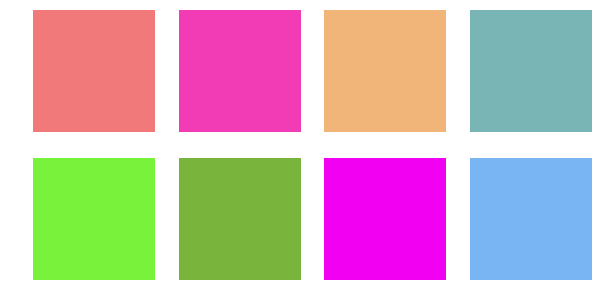

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for r in range(2):
    for c in range(4):
        ix = r*4+c
        axes[r,c].imshow(np.ones(shape=(200,200,3))*colors_test[ix])
        axes[r,c].axis('off')
plt.show()

# Vizualize textures

## Train

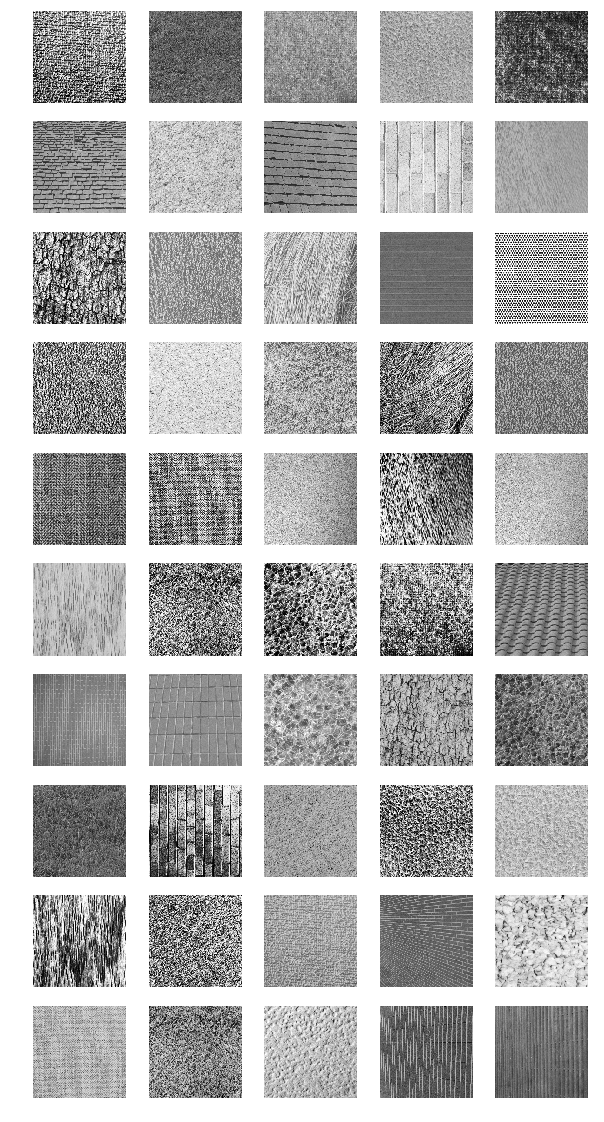

In [23]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10,20))
for r in range(10):
    for c in range(5):
        ix = r*5+c
        img = image.load_img('../data/textures/%s' % textures_train[ix],
                             target_size=(200, 200))
        img = image.img_to_array(img) / 255.
        axes[r,c].imshow(img)
        axes[r,c].axis('off')
plt.show()

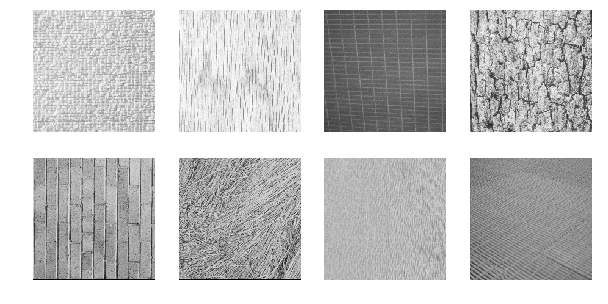

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for r in range(2):
    for c in range(4):
        ix = r*4+c
        img = image.load_img('../data/textures/%s' % textures_test[ix],
                             target_size=(200, 200))
        img = image.img_to_array(img) / 255.
        axes[r,c].imshow(img)
        axes[r,c].axis('off')
plt.show()

In [28]:
# Now compare to the original separations

In [29]:
colors_train, colors_test = generate_colors(nb_train=50, nb_test=8, random=False)
textures_train, textures_test = generate_textures(nb_train=50, nb_test=8, random=False)

# Visualize colors

## Train

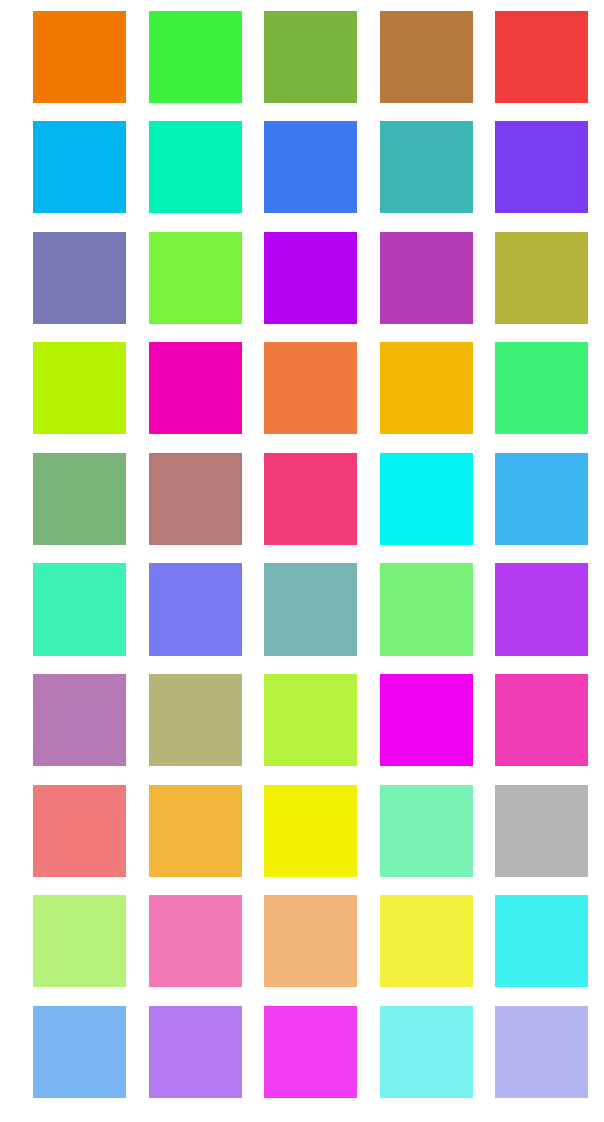

In [30]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10,20))
for r in range(10):
    for c in range(5):
        ix = r*5+c
        axes[r,c].imshow(np.ones(shape=(200,200,3))*colors_train[ix])
        axes[r,c].axis('off')
plt.show()

## Test

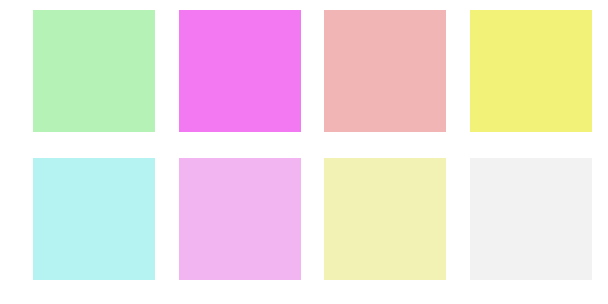

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for r in range(2):
    for c in range(4):
        ix = r*4+c
        axes[r,c].imshow(np.ones(shape=(200,200,3))*colors_test[ix])
        axes[r,c].axis('off')
plt.show()

# Visualize Textures

## Train

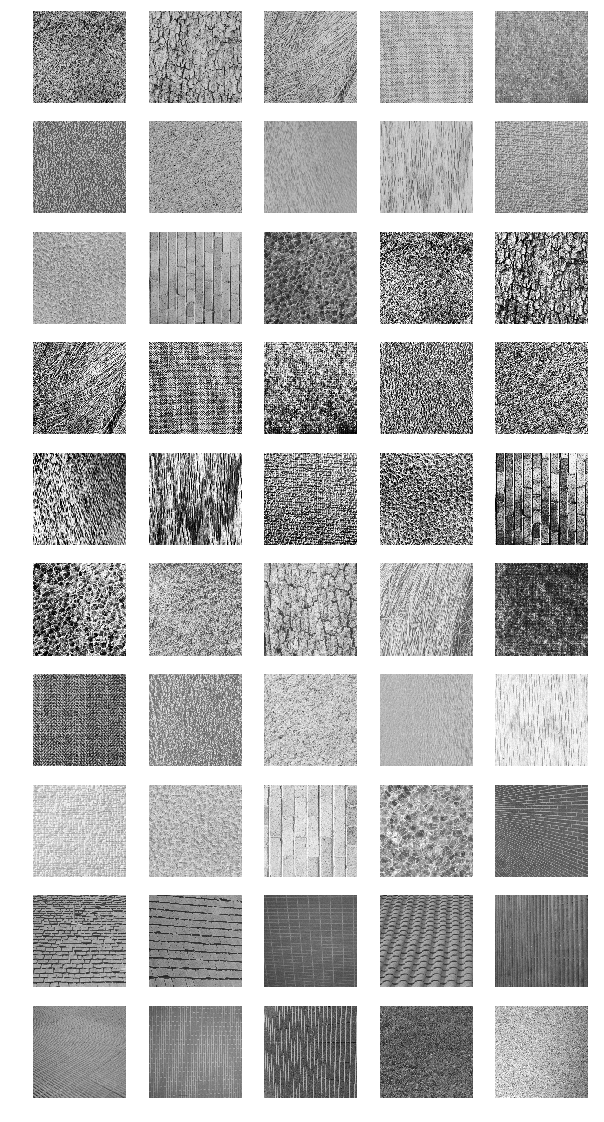

In [33]:
fig, axes = plt.subplots(nrows=10, ncols=5, figsize=(10,20))
for r in range(10):
    for c in range(5):
        ix = r*5+c
        img = image.load_img('../data/textures/%s' % textures_train[ix],
                             target_size=(200, 200))
        img = image.img_to_array(img) / 255.
        axes[r,c].imshow(img)
        axes[r,c].axis('off')
plt.show()

## Test

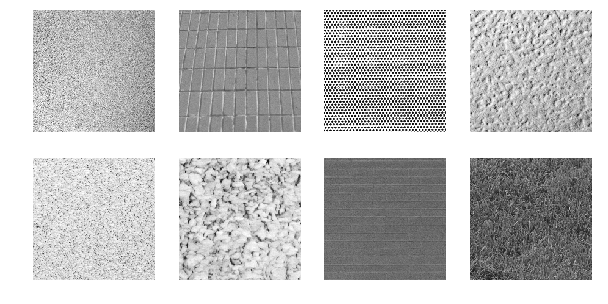

In [34]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10,5))
for r in range(2):
    for c in range(4):
        ix = r*4+c
        img = image.load_img('../data/textures/%s' % textures_test[ix],
                             target_size=(200, 200))
        img = image.img_to_array(img) / 255.
        axes[r,c].imshow(img)
        axes[r,c].axis('off')
plt.show()